In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_daily = pd.read_csv("daily_gap.csv")
df_district = pd.read_csv("district_gap.csv")
df_timeline = pd.read_csv("district_timeline.csv")
df_state = pd.read_csv("state_capture.csv")


In [2]:
print(df_daily.columns)
print(df_district.columns)
print(df_timeline.columns)


Index(['date', 'enrolled', 'biometrics', 'gap'], dtype='object')
Index(['state', 'district', 'enrolled', 'biometrics', 'gap'], dtype='object')
Index(['date', 'enrolled', 'biometrics'], dtype='object')


In [3]:
df_daily['date'] = pd.to_datetime(df_daily['date'], errors='coerce')
df_timeline['date'] = pd.to_datetime(df_timeline['date'], errors='coerce')

df_daily = df_daily.dropna(subset=['date', 'enrolled', 'biometrics', 'gap'])
df_district = df_district.dropna(subset=['district', 'enrolled', 'biometrics', 'gap'])
df_timeline = df_timeline.dropna(subset=['date', 'enrolled', 'biometrics'])

numeric_cols = ['enrolled', 'biometrics', 'gap']
for df in [df_daily, df_district, df_timeline]:
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)


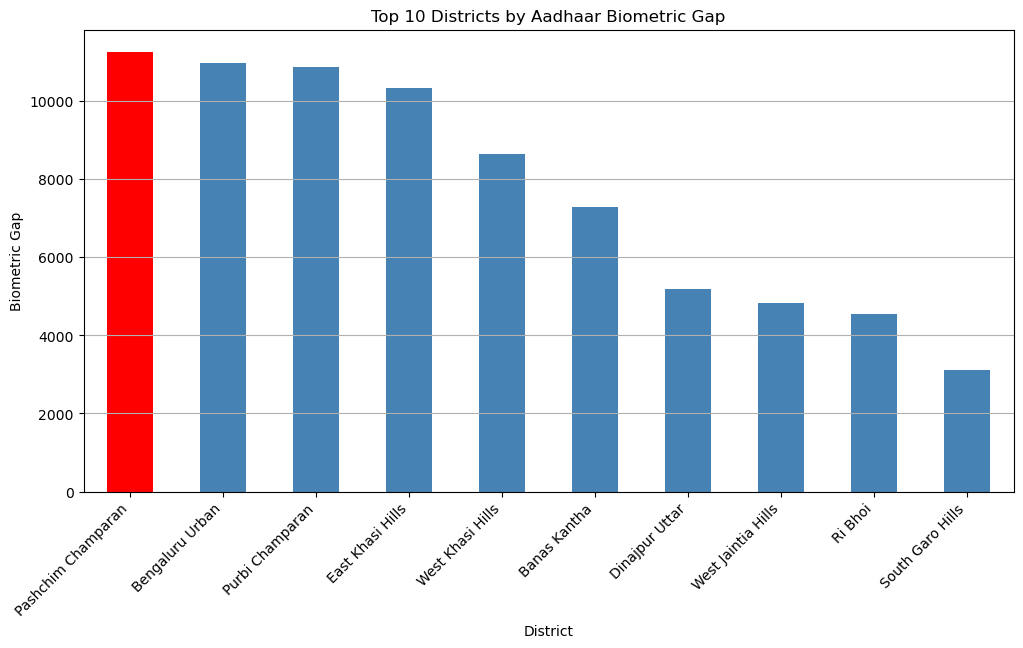

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_dist = pd.read_csv("district_gap.csv")

df_dist["enrolled"] = pd.to_numeric(df_dist["enrolled"], errors="coerce")
df_dist["biometrics"] = pd.to_numeric(df_dist["biometrics"], errors="coerce")

df_dist = df_dist.dropna()

df_dist["gap"] = df_dist["enrolled"] - df_dist["biometrics"]
df_dist["gap"] = df_dist["gap"].clip(lower=0)

top_gap = (
    df_dist.groupby("district")
    .agg(total_gap=("gap", "sum"))
    .sort_values("total_gap", ascending=False)
    .head(10)
)

colors = ["red"] + ["steelblue"] * (len(top_gap) - 1)

top_gap.plot(
    kind="bar",
    y="total_gap",
    color=colors,
    legend=False
)

plt.title("Top 10 Districts by Aadhaar Biometric Gap")
plt.xlabel("District")
plt.ylabel("Biometric Gap")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()


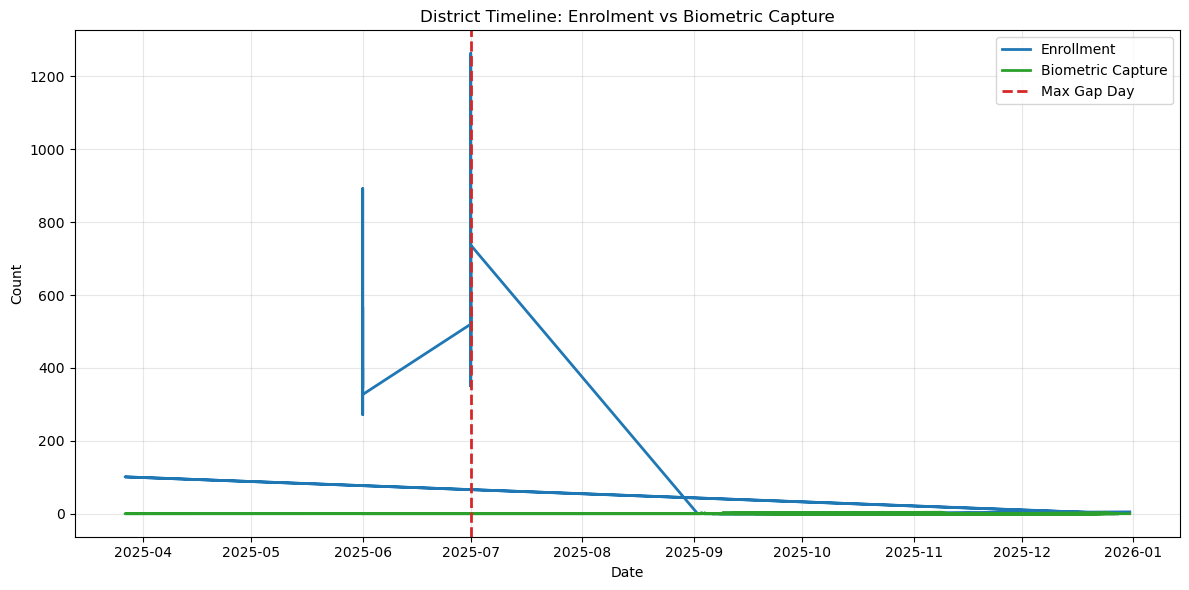

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("district_timeline.csv")

df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["date"])

df["enrolled"] = pd.to_numeric(df["enrolled"], errors="coerce")
df["biometrics"] = pd.to_numeric(df["biometrics"], errors="coerce")

df["gap"] = df["enrolled"] - df["biometrics"]

max_gap_date = df.loc[df["gap"].idxmax(), "date"]

plt.figure(figsize=(12, 6))

plt.plot(
    df["date"].values,
    df["enrolled"].values,
    color="#1f77b4",     
    linewidth=2,
    label="Enrollment"
)

plt.plot(
    df["date"].values,
    df["biometrics"].values,
    color="#2ca02c",     
    linewidth=2,
    label="Biometric Capture"
)

plt.axvline(
    max_gap_date,
    color="#d62728",     
    linestyle="--",
    linewidth=2,
    label="Max Gap Day"
)

plt.title("District Timeline: Enrolment vs Biometric Capture")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
